# Unit 5 - Financial Planning


In [48]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [49]:
# Load .env enviroment variables
load_dotenv()

True

In [50]:
os.environ['HOME']

'C:\\Users\\aduri'

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [52]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [73]:
import json
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
requests.get(btc_url)
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
#print(data_btc)
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
requests.get(eth_url)
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
#print(data_eth)
#print(json.dumps(data_btc, indent=4))
#print(json.dumps(data_eth, indent=4))

In [76]:
# Fetch current BTC price
#current_btc_price = data_btc['1']['quotes']['USD']['price']
#for key, value in data_btc.items():
#    print(key, value)

current_btc_price= data_btc['data']['1']['quotes']['USD']['price']

print(current_btc_price)

# Fetch current ETH price

current_eth_price= data_eth['data']['1027']['quotes']['USD']['price']

print(current_eth_price)

# Compute current value of my crpto
Current_value_crypto = (my_btc * current_btc_price) + (my_eth * current_eth_price)

print(Current_value_crypto)


# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

34878.0
1106.91
47720.223


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [77]:
# Current amount of shares
my_agg = 200
my_spy = 50


In [80]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [81]:
# Format current date as ISO format

current_date = pd.Timestamp("2021-11-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=current_date
).df

# Preview DataFrame
df_ticker.head(10)

AGG                                       \
                             open      high      low    close   volume   
2019-05-01 00:00:00-04:00  108.47  108.7600  108.320  108.390  4426906   
2019-05-02 00:00:00-04:00  108.33  108.3300  108.100  108.165  2230918   
2019-05-03 00:00:00-04:00  108.32  108.4200  108.275  108.350  2179061   
2019-05-06 00:00:00-04:00  108.56  108.5700  108.440  108.460  4495020   
2019-05-07 00:00:00-04:00  108.63  108.7000  108.585  108.620  2788574   
2019-05-08 00:00:00-04:00  108.74  108.8100  108.550  108.570  5808492   
2019-05-09 00:00:00-04:00  108.78  108.8100  108.550  108.670  4669136   
2019-05-10 00:00:00-04:00  108.74  108.8200  108.630  108.670  4810765   
2019-05-13 00:00:00-04:00  108.83  108.9768  108.815  108.860  5116696   
2019-05-14 00:00:00-04:00  108.90  108.9700  108.740  108.940  4976560   

                              SPY                                       
                             open    high     low     close     volume  
2019-05-01 00:00:00-04:00  294.72  294.95  291.80  291.8400   59432706  
2019-05-02 00:00:00-04:00  291.68  292.70  289.52  291.2700   59209780  
2019-05-03 00:00:00-04:00  292.82  294.34  292.56  294.0200   45416907  
2019-05-06 00:00:00-04:00  289.25  293.31  288.90  292.8700   75426654  
2019-05-07 00:00:00-04:00  290.15  290.81  285.81  288.0400  118960368  
2019-05-08 00:00:00-04:00  287.53  289.43  286.87  287.5600   75117753  
2019-05-09 00:00:00-04:00  285.23  287.33  283.30  286.7500   90532298  
2019-05-10 00:00:00-04:00  285.62  288.94  282.30  288.0300   97407327  
2019-05-13 00:00:00-04:00  282.42  283.49  279.93  280.9905  106597028  
2019-05-14 00:00:00-04:00  281.99  285.10  281.85  283.3300   68269143

In [87]:
# Pick AGG and SPY close prices

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

agg_close_price = (df_closing_prices["AGG"][-1])
spy_close_price = (df_closing_prices["SPY"][-1])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.7662
Current SPY closing price: $377.3702


In [95]:
# Compute the current value of shares
my_total_spy = (my_spy * spy_close_price)
my_total_agg = (my_agg * agg_close_price)
Total_Value_of_shares = my_total_spy + my_total_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_total_spy:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_total_agg:0.2f}")
print(f"Total Value of Shares is ${Total_Value_of_shares}")

The current value of your 50 SPY shares is $18868.51
The current value of your 200 AGG shares is $23353.24
Total Value of Shares is $42221.75


### Savings Health Analysis

In [130]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
list = [Current_value_crypto,Total_Value_of_shares]

df_savings = pd.DataFrame(list, index =['Crypto', 'Shares'], 
                                              columns =['amount'])

# Display savings DataFrame
df_savings.head()

,amount
Crypto,47720.223
Shares,42221.750


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000289F2127CD0>],
      dtype=object)

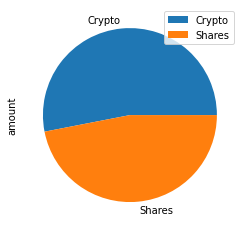

In [136]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [141]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
Total_Savings = Current_value_crypto + Total_Value_of_shares
Total_Savings
# Validate saving health
print(f"The current value of your savings is quite good {Total_Savings} which is greater than ${emergency_fund}")

The current value of your savings is quite good 89941.973 which is greater than $36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [142]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [145]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [167]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)
#Assuming 60 , 40 weightage in investments for AGG and SPY respectively

In [148]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [149]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999032,1.006553,0.996557,0.996318,1.006184,0.993024,0.991353,1.004479,0.986710,1.007139,...,1.011384,0.999543,1.012414,0.996362,0.998721,0.998793,0.999922,1.007834,0.996094,1.003825
2,0.998121,1.007475,0.993863,0.990514,1.010891,0.999281,0.985604,1.016994,0.990278,1.001755,...,1.016768,0.999478,1.015605,0.991696,1.006298,1.001029,1.000400,1.007437,0.994035,1.015139
3,0.998588,1.006952,0.993932,0.986438,1.012857,0.992203,0.994172,1.010502,0.985508,0.997090,...,1.025179,1.004988,1.019559,0.985311,1.014965,0.992955,1.000427,1.018328,0.989904,1.007393
4,0.996046,1.003647,0.996974,0.981504,1.009768,0.982305,0.989203,1.015064,0.979130,0.994729,...,1.028851,1.010629,1.017863,0.988444,1.011245,0.991377,0.994802,1.005892,0.981101,1.009224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.659073,8.236552,5.519419,2.550610,5.892171,5.078975,4.617809,4.393888,5.141573,8.440967,...,6.318948,4.336830,3.782985,2.564844,4.262573,4.702898,3.916723,12.976144,3.956071,4.889444
7557,6.658905,8.233481,5.522995,2.542113,5.927257,5.092764,4.627972,4.373526,5.172338,8.353355,...,6.337346,4.324735,3.799108,2.561740,4.283189,4.717388,3.917199,12.923531,3.927330,4.951049
7558,6.668693,8.198551,5.523980,2.525995,5.884886,5.137133,4.642814,4.402791,5.149649,8.328629,...,6.323109,4.340120,3.824292,2.564871,4.216094,4.729813,3.905649,12.872650,3.966534,4.988962
7559,6.683798,8.228123,5.470237,2.524259,5.874381,5.111451,4.646110,4.435510,5.140082,8.309313,...,6.311216,4.330269,3.821409,2.551929,4.199091,4.753059,3.858048,12.940186,3.992694,4.986080


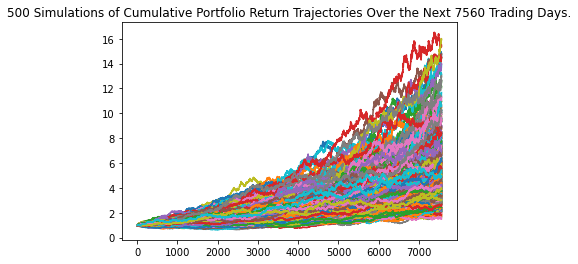

In [150]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

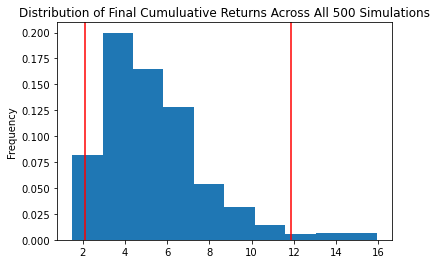

In [152]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

#Saving the chart
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [154]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_stats = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
simulated_stats

count           500.000000
mean              5.403468
std               2.457945
min               1.503318
25%               3.683125
50%               4.966829
75%               6.670034
max              15.918054
95% CI Lower      2.089452
95% CI Upper     11.871126
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [162]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(simulated_stats[8]*initial_investment,2)
ci_upper = round(simulated_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41789.05 and $237422.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [164]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(simulated_stats[8]*initial_investment,2)
ci_upper = round(simulated_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62683.57 and $356133.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [168]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_five_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [169]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996194,1.000390,1.005581,1.006837,1.001618,1.002806,0.997037,1.002088,1.011842,1.005438,...,1.004751,0.997710,1.002863,0.993718,1.000638,1.005831,1.007905,0.998990,1.004249,1.004793
2,0.998184,1.000825,0.999477,1.001317,1.009254,1.000944,1.001291,1.000696,1.006466,1.005630,...,0.996275,1.000594,1.001135,0.994848,1.007188,1.016465,1.010192,0.995437,1.005308,1.011911
3,0.989593,0.999039,0.990511,1.004978,0.998784,0.999468,1.015747,1.005169,1.009779,1.006016,...,0.989080,0.999891,0.999010,0.991588,1.016966,1.011705,1.011917,1.000611,1.007152,1.013517
4,0.987025,1.001280,1.005692,1.007344,0.987554,1.003002,1.013689,1.005264,1.003922,1.012027,...,0.989975,0.992978,1.000881,0.991807,1.008535,1.012980,1.018804,0.997379,1.010162,1.022806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.742470,1.597592,3.523452,3.082256,4.305105,6.192612,8.405280,14.686755,7.009907,6.423202,...,3.523734,6.218129,8.539257,8.920374,4.196064,5.982791,4.118299,9.184356,2.506348,4.668807
7557,8.763013,1.587250,3.507260,3.103161,4.268892,6.232555,8.389828,14.723016,7.077367,6.489689,...,3.488296,6.242820,8.507175,8.899335,4.189630,5.936350,4.121001,9.228628,2.500373,4.637376
7558,8.798866,1.576853,3.527863,3.103537,4.270351,6.177547,8.394859,14.807025,7.141833,6.465594,...,3.469077,6.285174,8.461206,8.903031,4.187034,5.996806,4.140424,9.232506,2.481088,4.636260
7559,8.796205,1.572622,3.529372,3.085973,4.245811,6.118223,8.509632,14.899576,7.125851,6.518640,...,3.440505,6.306288,8.483384,8.884596,4.168509,6.014572,4.181321,9.207718,2.444239,4.643242


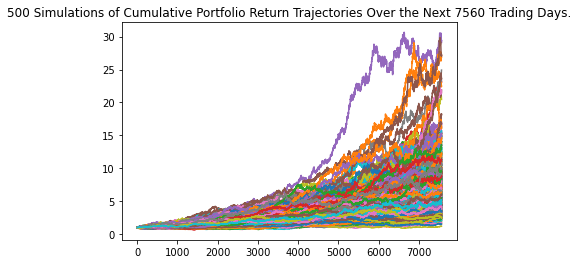

In [170]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

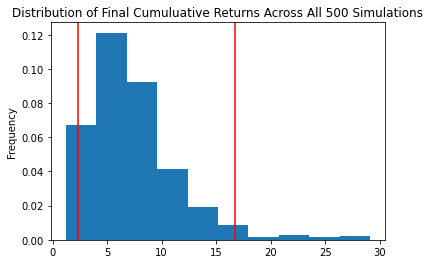

In [171]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [173]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_tbl)


count           500.000000
mean              7.382693
std               4.121448
min               1.213903
25%               4.539559
50%               6.499784
75%               9.154175
max              29.112229
95% CI Lower      2.344469
95% CI Upper     16.753754
Name: 7560, dtype: float64


In [175]:
# Set initial investment
initial_investment= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,00

ci_lower_five = round(fiveyear_tbl[8]*initial_investment,2)
ci_upper_five = round(fiveyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $140668.12 and $1005225.27


### Ten Years Retirement Option

In [177]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#Assuming change in weights to .4 and .6 and simulated for 10 years
MC_ten_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_ten_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [178]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000192,0.996262,1.000594,0.989607,0.998164,0.999953,0.995605,0.998425,0.998829,0.991463,...,1.002312,0.993202,1.004865,1.001126,1.001233,1.011447,1.012059,1.016620,1.000942,0.999765
2,0.983173,0.994465,0.995808,0.982302,0.998613,1.001848,0.997532,0.986397,1.003547,1.003764,...,1.013070,1.006277,1.019571,1.000504,1.004899,1.017129,1.005863,1.013963,1.002308,0.999021
3,0.991599,0.998985,0.997422,0.975687,0.993211,1.007054,1.008369,0.985732,0.993903,1.013766,...,1.036630,1.006844,1.012728,0.995529,1.021976,1.009725,1.000708,1.015864,1.004049,1.000034
4,0.996849,0.984262,0.987427,0.981788,0.991210,1.009198,0.997733,0.992262,0.991731,1.025514,...,1.051819,1.002652,1.012009,0.993129,1.018771,1.012792,1.019593,1.018938,1.013638,1.004174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.049303,1.474155,0.842656,2.154294,0.624835,3.141519,2.703481,1.829193,1.830411,2.396062,...,2.136242,1.945575,3.108913,2.269487,2.383171,1.152612,1.654629,2.212597,3.028763,1.342834
2517,2.051879,1.468888,0.844701,2.150350,0.616279,3.150111,2.708619,1.828954,1.830969,2.390273,...,2.135972,1.938800,3.117049,2.294301,2.396990,1.141997,1.651858,2.224292,3.000094,1.337002
2518,2.045609,1.473457,0.838301,2.146024,0.611132,3.126746,2.739003,1.809385,1.841017,2.414133,...,2.120091,1.974827,3.102203,2.312508,2.418487,1.141332,1.646078,2.231476,3.008360,1.345616
2519,2.036414,1.459570,0.837928,2.151114,0.611987,3.136963,2.745377,1.811233,1.830518,2.423172,...,2.133354,1.976673,3.093663,2.288105,2.420275,1.150837,1.663109,2.242094,2.995122,1.356830


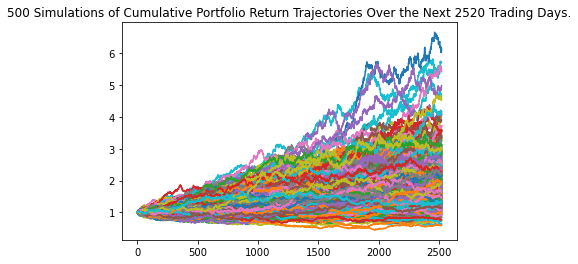

In [179]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

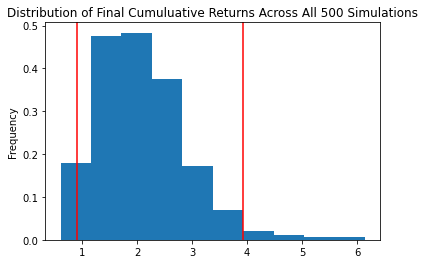

In [180]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [182]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
ten_year_tbl

count           500.000000
mean              2.083125
std               0.817703
min               0.599798
25%               1.486777
50%               1.979819
75%               2.567795
max               6.144723
95% CI Lower      0.908136
95% CI Upper      3.928163
Name: 2520, dtype: float64

In [185]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_tbl[8]*initial_investment,2)
ci_upper_ten = round(ten_year_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $54488.14 and $235689.78
